# Hilda Beltrán Acosta

### A01251916

### Project 1

### September 8th, 2023

In [2]:
# Import libraries to process, manipulate and extract data
import numpy as np
import pandas as pd

In [3]:
# Import data from 'dataus2023.csv' file
data = pd.read_csv('dataus2023.csv')

# Import data from 'firmsus2023.csv' file
firms = pd.read_csv('firmsus2023.csv')

## Manage metadata from 'q' column

Since our 'q' column has metadata of the period of time between each quarter of the year, we have to convert it to a PeriodIndex object. This will be helpful to create a MultiIndex and be able to access the data easier, this will store information about the time span of each quarter.

In [33]:
# Converting 'q' column into PeriodIndex object, with quarterly frequency
data['qperiod'] = pd.PeriodIndex(data.q, freq='Q')

# Use a MultiIndex with Firm and Quarter period
data.set_index(["firm","qperiod"], inplace=True)

## Merge DataFrames of Data US and Firms US

In [5]:
# Slice DataFrame with columns we're interested in
firms1 = firms[["empresa", "Nombre", "status", "naics1"]]

# Rename this columns as follows
firms1.columns = ['firm', 'Empresa', 'status', 'industria']

# Merge this new DataFrame with the data DataFrame
data = pd.merge(data, firms1, on="firm", how='left')

# 1.1 Calculation of financial variables and ratios

## Calculate log quarterly returns (rq) and log annual returns (ry).

We calculate these returns in order to evaluate the performance of these assets during a period of time. We first make an analysis of them quarterly, then annually.

In [6]:
# Calculate log quarterly returns
# We calculate the returns (difference) between the actual and previous data
data['rq'] = np.log(data['adjprice']).diff(1)
#data['rq'].isna().sum()

# Calculate log annually returns
# We calculate the returns (difference) between the actual and four previous rows data, i.e. q4 - q1
data['ry'] = np.log(data['adjprice']).diff(4)
#data['ry']

## Calculate 1-quarter future log quarterly returns (f1rq).

We calculate these future quarterly returns to predict how the returns will behave in future periods of time.

In [7]:
# Use the quarterly returns calculated in the next quarter as a prediction for the current f1rq
data['f1rq'] = data['rq'].shift(-1)

## Calculate operating profit 

### Also called earnings before interest and taxes: ebit = revenue - cogs - sgae

The operating profit of a company is the profitability and efficiency of its primary activities, not taking into account interest and taxes. To calculate this operating profit, we subtract the Cost of Goods Sold and the Operating Expenses, which globally represents how well a company manages its operations in order to end with beneficial profits.

In [8]:
# Calculate the operating profit with the data we already have from the dataset
data['ebit'] = data['revenue'] - data['cogs'] - data['sgae']

## Calculate operating profit margin
### opm = ebit / revenue

The operating profit margin is a metric used to evaluate the earnings before interest and taxes with respect to the total revenues. Meaning it's a ratio between the profitability of a company's primary activities and the total income the company had from this core activities. We can use this metric to evaluate the performance the company is having and understand its financial health.

In [9]:
# Calculate the operating profit margin
# Since it's a ratio, we need to get rid of the zero data in 'revenue', so we replace this
# values with NaN to obtain a division result of NaN
data['opm'] = np.where(data['revenue'] == 0, np.NaN, data['ebit'] / data['revenue'])

## Calculate net income
### netincome = ebit + otherincome + extraordinaryitems - financial expenses - incometax

The net income is the total gain or loss a company had over a specific period of time, this is after deducting all costs from obligations and responsabilites. Giving us an insight on what a comany's performance was, and in a future, it's capability of paying dividends and reinvesting in the company, which is great information for investors.

In [10]:
# Calculate net income
data['netincome'] = data['ebit'] + data['otherincome'] + data['extraordinaryitems'] - data['finexp'] - data['incometax']

## Calculate profit margin
### pm = netincome / revenue

Profit margin is a ratio calculated to obtain information about the company's ability to generate profits after all obligations and responsabilities are met. This margin is also called the net profit margin, since it's calculated with the net income and the revenues. A higher value for the profit margin means there's a higher percentage of the revenues staying as profits for the company.

In [11]:
# Calculate profit margin
# Since it's a ratio, we need to get rid of the zero data in 'revenue', so we replace this
# values with NaN to obtain a division result of NaN

data['pm'] = np.where(data['revenue'] == 0, np.NaN, data['netincome'] / data['revenue'])

## Calculate asset turn over ratio
### ato = revenue / totalassets

The asset turn over ratio represents the ability a company has of generating profits based in its total assets, or in other words, how a company uses its total assets to generate sales that end up as profits. Generally a higher asset turn over ratio means that a company uses their total assets efficiently, even though there's a point in which the value is too high and it can mean there were aggressive behaviours. As an example, this can be interpreted as heavy discounting and not a high performance activity.

In [12]:
# Calculate asset turn over ratio
# Since it's a ratio, we need to get rid of the zero data in 'revenue', so we replace this
# values with NaN to obtain a division result of NaN

data['ato'] = np.where(data['revenue'] == 0, np.NaN, data['revenue'] / data['totalassets'])

## Calculate acid ratio
### acidratio = currentassets / currentliabilities

The acid ratio is known as the ability of fullfilling certain or all obligations and responsabilities with it's current assets, it's a way of measuring whether a company can or can't face short-term financial challenges.

In [13]:
# Calculate acid ratio
# Since it's a ratio, we need to get rid of the zero data in 'currentliabilities', so we replace this
# values with NaN to obtain a division result of NaN

data['acidratio'] = np.where(data['currentliabilities'] == 0, np.NaN, data['currentassets'] / data['currentliabilities'])

## Calculate financial leverage ratio
### finlev=longdebt / totalassets

The financial leverage ratio is a metric used to understand how the operations of a company relies in borrowed finances, meaning the ratio between the debt and the total assets of a company. By having certain debts there's a risk involved, since there's obligations and it's used to evaluate possible outcomes when making important financial decisions. When having a lower value for this ratio, it means that there's a lower reliance in debt and more in the total assets owned by the company.

In [14]:
# Calculate financial leverage ratio
# Since it's a ratio, we need to get rid of the zero data in 'totalassets', so we replace this
# values with NaN to obtain a division result of NaN

data['finlev'] = np.where(data['totalassets'] == 0, np.NaN, data['longdebt'] / data['totalassets'])

## Calculate market value
### mvalue = originalprice * sharesoutstanding

The market value represents an estimation of what a company's worth is at a specific period of time, it's more of what it's believed it's worth. It's calculated by the price people are willing to pay for a share from the company's stock times the total number of shares that are available for trading in the market. This market value will mostly be changing daily, since the price for the shares and the number of shares available can change.

In [15]:
# Calculate market value

data['mvalue'] = data['originalprice'] * data['sharesoutstanding']

# DUDA signo - o *
## Calculate book value
### bookvalue = totalassets - totalliabilities

The book value represents the net worth of a company, which is calculated by the difference between the total assets owned by the company and the economic obligations it has. It can be seen as the theoretical value of a company, since the market value has a closer focus in the actual point in time and different factors. There's always a difference between this market value and book value, used to understand the financial health of a company, and whether it's performance keeps the company alive or not.

In [16]:
# Calculate book value

data['bookvalue'] = data['totalassets'] - data['totalliabilities']

# 1.2 Firm Composition of the US financial market

Considering the most recent financial quarter of the dataset, which is the second quarter of 2023, since it's the last data we have registered.

## Show how many active firms by industry there are in the sample

In [17]:
# Change display format to show only two decimals
pd.options.display.float_format = '{:,.2f}'.format

# Filter DataFrame where status is activo and the quarter is 2023q2
active_2023q2 = data.loc[(data['status'] == "activo") & (data['q'] == "2023q2")]

# Slice DataFrame to obtain columns of industry and firm
# We group by industry and count the total number of active firms by industry
active_2023q2[['industria', 'firm']].groupby('industria').count()

# Display the information by industry, with the count of firms, descriptive statistics of market value and book value
#This shows the total active firms by industry
industrysummary=active_2023q2.groupby('industria').agg(
{ 'firm':['count'],
 'mvalue':['min','max','median','std'],'bookvalue':['min','max','median','std']}
)
industrysummary

firm       mvalue  \
                                                   count          min   
industria                                                               
-                                                      2 5,231,091.58   
Agricultura, ganadería, aprovechamiento foresta...    17     3,687.58   
Comercio al por mayor                                 79     5,458.41   
Comercio al por menor                                145     3,795.68   
Construcción                                          46     2,212.28   
Empresas de electricidad, gas y agua                  77    33,728.24   
Industrias manufactureras                           1540       796.17   
Información en medios masivos                        256     3,256.72   
Minería, explotación de canteras y extracción d...   113        34.17   
Otros servicios excepto actividades gubernament...    17    16,742.10   
Servicios de alojamiento temporal y de preparac...    71     9,806.64   
Servicios de apoyo a los negocios y manejo de r...   128     2,802.16   
Servicios de esparcimiento culturales y deporti...    24     3,092.33   
Servicios de salud y de asistencia social             63       717.42   
Servicios educativos                                  13    83,986.36   
Servicios financieros y de seguros                   686     5,559.04   
Servicios inmobiliarios y de alquiler de bienes...    68     3,440.61   
Servicios profesionales, científicos y técnicos      137     3,638.32   
Transportes, correos y almacenamiento                 70    29,816.46   

                                                                     \
                                                                max   
industria                                                             
-                                                      5,231,091.58   
Agricultura, ganadería, aprovechamiento foresta...    45,050,089.23   
Comercio al por mayor                                 57,645,136.00   
Comercio al por menor                              1,337,539,706.77   
Construcción                                          41,504,950.92   
Empresas de electricidad, gas y agua                 150,159,578.58   
Industrias manufactureras                          3,050,896,326.94   
Información en medios masivos                      2,532,080,938.79   
Minería, explotación de canteras y extracción d...    69,808,657.11   
Otros servicios excepto actividades gubernament...     9,764,061.13   
Servicios de alojamiento temporal y de preparac...   217,470,301.71   
Servicios de apoyo a los negocios y manejo de r...   444,875,318.55   
Servicios de esparcimiento culturales y deporti...   163,141,789.33   
Servicios de salud y de asistencia social             83,514,600.50   
Servicios educativos                                   3,171,234.18   
Servicios financieros y de seguros                   750,735,436.68   
Servicios inmobiliarios y de alquiler de bienes...   195,201,712.35   
Servicios profesionales, científicos y técnicos    1,519,830,900.00   
Transportes, correos y almacenamiento                153,955,377.34   

                                                                 \
                                                         median   
industria                                                         
-                                                  5,231,091.58   
Agricultura, ganadería, aprovechamiento foresta...   857,921.50   
Comercio al por mayor                              1,450,954.00   
Comercio al por menor                              1,662,158.77   
Construcción                                       2,559,768.80   
Empresas de electricidad, gas y agua               5,192,340.89   
Industrias manufactureras                            684,326.81   
Información en medios masivos                      2,370,194.81   
Minería, explotación de canteras y extracción d... 1,118,078.70   
Otros servicios excepto actividades gubernament... 1,073,749.25   
Servicios d

## For each industry (and for all industries), what can you say about the typical firm size in terms of market value and book value? 

### 'Agricultura, ganadería, aprovechamiento forestal, pesca y caza'

<Axes: title={'center': 'Market value of Agriculture'}, ylabel='Frequency'>

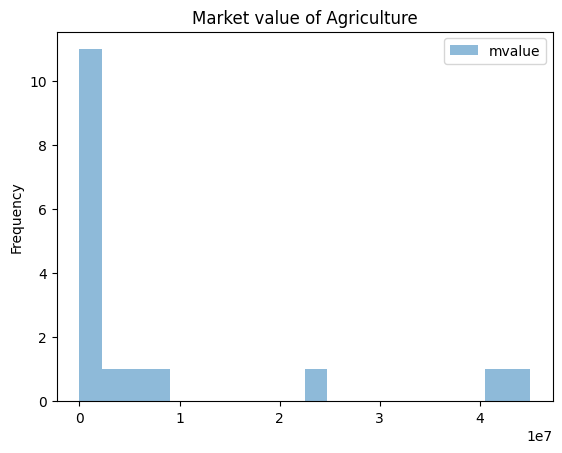

In [18]:
# Filter by industry
mvalue_agricultura = active_2023q2.loc[active_2023q2['industria'] == "Agricultura, ganadería, aprovechamiento forestal, pesca y caza"]

# Get the mvalue attribute
mvalue_agricultura = mvalue_agricultura[['mvalue']]

# Plot a histogram with all the data
mvalue_agricultura.plot.hist(bins = 20, alpha = 0.5, title = "Market value of Agriculture")

<Axes: title={'center': 'Book value of Agriculture'}, ylabel='Frequency'>

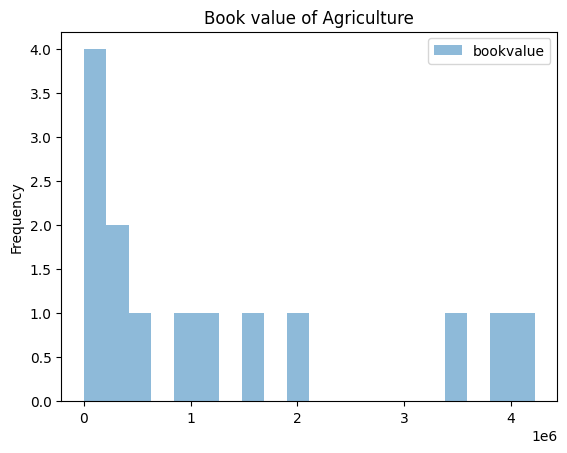

In [19]:
# Filter by industry
bvalue_agricultura = active_2023q2.loc[active_2023q2['industria'] == "Agricultura, ganadería, aprovechamiento forestal, pesca y caza"]

# Get the bookvalue attribute
bvalue_agricultura = bvalue_agricultura[['bookvalue']]

# Plot a histogram with all the data
bvalue_agricultura.plot.hist(bins = 20, alpha = 0.5, title = "Book value of Agriculture")

Since we can observe in the last two histograms, either of our data is uniformly spread like a gaussian bell, meaning we can't trust our mean value to be representative for our data. Something more representative would be the median value, close to where most of the data is located. Which help us reduce the impact extreme data (low and high) can have in the calculus of typical firm size.

For the industry 'Agricultura, ganadería, aprovechamiento forestal, pesca y caza', the typical firm size in terms of market value and book value is of 857,921.50 and 724,592.00. Meaning the typical firm size in terms of market is greater than the typical firm size in terms of book value, representing that the market values the company above the book value.

## How much these variables change within each industry? 

These variables have significant changes within each industry, since not all industries trade the same and there's not the same quantity of firms in each industry sector.

## How firm size (in market value) is distributed?

<Axes: title={'center': 'Histogram of Market value'}, ylabel='Frequency'>

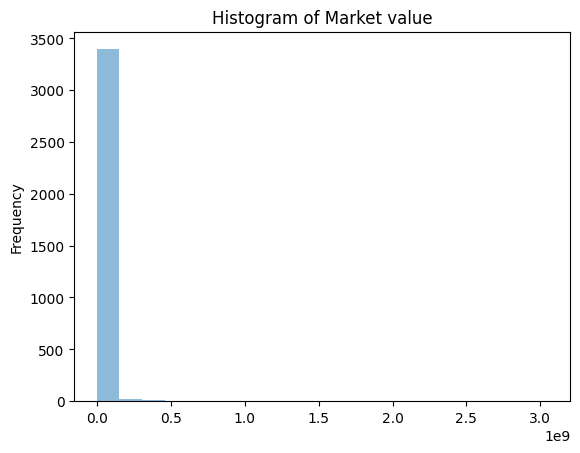

In [20]:
active_2023q2_1 = active_2023q2['mvalue']
active_2023q2_1.plot.hist(bins = 20, alpha = 0.5, title = "Histogram of Market value")

When evaluating the distribution of the firm size in terms of market value, we can observe almost all of our data is located near the value of 1,170,074, and there are some extreme values around 735,452,839 and 3,050,896,326.

## Which are the biggest 10 US firms in terms of market value and how far they are from the typical size of a US firm?

In [21]:
print('Typical size of a US firm in terms of market value', active_2023q2.mvalue.median())
active_2023q2[['firm', 'mvalue','Empresa','industria']].sort_values(by='mvalue',ascending=False).head(10)

Typical size of a US firm in terms of market value 1170074.0124050002


,firm,mvalue,Empresa,industria
1138,AAPL,"3,050,896,326.94",Apple Inc,Industrias manufactureras
316182,MSFT,"2,532,080,938.79",Microsoft Corp,Información en medios masivos
207232,GOOGL,"1,519,830,900.00",Alphabet Inc,"Servicios profesionales, científicos y técnicos"
28396,AMZN,"1,337,539,706.77","Amazon.Com, Inc",Comercio al por menor
338687,NVDA,"1,044,859,400.00",Nvidia Corp,Industrias manufactureras
478367,TSLA,"829,681,140.87","Tesla, Inc",Industrias manufactureras
72866,BRK_A,"750,735,436.68",Berkshire Hathaway Inc,Servicios financieros y de seguros
301173,META,"735,452,839.12","Meta Platforms, Inc","Servicios profesionales, científicos y técnicos"
489577,UNH,"447,491,234.90",Unitedhealth Group Inc,Servicios financieros y de seguros
280653,LLY,"445,190,020.12",Eli Lilly And Company,Industrias manufactureras


The 10 biggest US firms in terms of market value are quite far from the typical size of a US firm, since most of the sizes are considered small, the median value, which represents the typical size, is really far. This is due to extreme values, in this case the biggest US firms, being present which creates a standard deviation quite big. Explaining this distances between the biggest firms and the typical size.

## Which are the biggest 10 US firms in terms of book value and how far they are from the typical size of a US firm?

In [22]:
print('Typical size of a US firm in terms of book value', active_2023q2.bookvalue.median())
active_2023q2[['firm', 'bookvalue','Empresa','industria']].sort_values(by='bookvalue',ascending=False).head(10)

Typical size of a US firm in terms of book value 500654.5


,firm,bookvalue,Empresa,industria
72866,BRK_A,"539,883,000.00",Berkshire Hathaway Inc,Servicios financieros y de seguros
259753,JPM,"312,516,000.00",Jpmorgan Chase & Co,Servicios financieros y de seguros
53286,BAC,"283,319,000.00",Bank Of America Corp,Servicios financieros y de seguros
207232,GOOGL,"267,141,000.00",Alphabet Inc,"Servicios profesionales, científicos y técnicos"
79421,C,"209,422,000.00",Citigroup Inc,Servicios financieros y de seguros
525961,XOM,"206,997,000.00",Exxon Mobil Corp,Industrias manufactureras
316182,MSFT,"206,223,000.00",Microsoft Corp,Información en medios masivos
513136,WFC,"181,952,000.00",Wells Fargo & Company,Servicios financieros y de seguros
28396,AMZN,"168,602,000.00","Amazon.Com, Inc",Comercio al por menor
127623,CVX,"159,298,000.00",Chevron Corp,Industrias manufactureras


The 10 biggest US firms in terms of book value are quite far from the typical size of a US firm, since most of the sizes are considered small, the median value, which represents the typical size, is really far. This is due to extreme values, in this case the biggest US firms, being present which creates a standard deviation quite big. Explaining this distances between the biggest firms and the typical size.

Since the book value is a theoretical value of a company, there's not the same companies in the 10 biggest US firms according to their market value than the ones present in the 10 biggest US firms according to the book value. 

# 1.3 Evolution of the US financial market

Considering the whole history of financial data for all firms, and only annual fiscal information (selecting fiscalmonth=12)

## How the total market value of the US market has changed over the years? Do a table and/or graph and explain

In [23]:
# Filter the data DataFrame to find the last fiscal month of the year
datay=data.loc[data['fiscalmonth']==12]

# Group the market value by year and sum this values
mvaly = datay[['mvalue', 'year']].groupby('year').sum()
mvaly

,mvalue
year,
2000,"12,814,978,634.15"
2001,"11,494,392,671.37"
2002,"9,494,723,157.61"
2003,"11,675,951,523.21"
2004,"13,230,878,635.88"
2005,"13,789,108,526.52"
2006,"15,461,254,772.55"
2007,"16,149,130,338.06"
2008,"10,395,016,561.41"


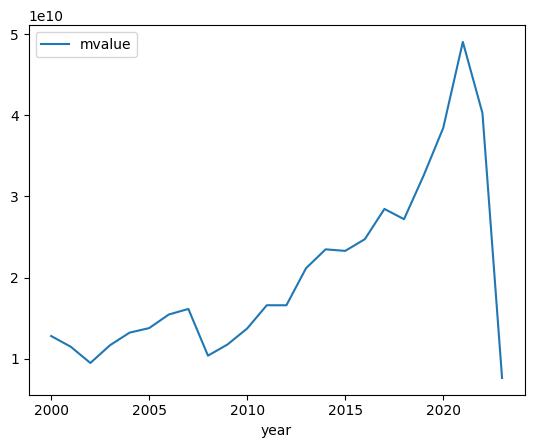

In [24]:
# Graph the information stored in the last table
mvaly = datay[['year','mvalue']].groupby('year').sum().plot(legend=True)

TAKING A LOOK INTO THE GRAPH, THERE'S A NOTICEABLE GROWTH BETWEEN THE MARKET VALUE IN 2000 AND IN 2022, WHICH IS THE LAST 12TH FISCAL MONTH, THIS GROWTH IS OF ABOUT 4 OR 5 TIMES BIGGER. WE CAN'T TAKE INTO CONSIDERATION THE YEAR 2023 SINCE IT'S NOT COMPLETE YET, AND THE EVALUATION CONSIDERS THE MARKET VALUE AMONG THE YEAR, SO THE LAST COMPLETE YEAR IS 2022.

ANALYZING ITS BEHAVIOUR WE CAN SEE THE TREND FOR THE MARKET VALUE IS TO GROW, ALMOST ALWAYS, WHICH CAN GIVE US INSIGHTS ON POTENTIAL INVESTMENT OPPORTUNITIES. WE CAN NOTICE THERE'S NOT EXTREME CHANGES BETWEEN ONE YEAR AND ANOTHER, MEANING THE MARKET VALUE EXPONENTIALLY INCREMENTS AND THEN DECREMENTS, MEANING IT'S VOLATILITY IS LOW AND THIS CAN REPRESENT LOWER RISKS WHEN INVESTING. EVEN THOUGH THERE'S A LOWER RISK, THIS LOWER FLUCTUATIONS MAY ALSO REPRESENT LESS OPORTUNITIES FOR INVESTORS.

THIS GRAPH CAN ALSO SHOW US SPECIAL EVENTS THAT HAPPENED IN THIS HISTORICAL VALUES, WE CAN NOTICE A DECLINE IN THE MARKET VALUE AROUND THE YEAR 2020, IN WHICH THE COVID-19 PANDEMIC HAD ITS GREATEST IMPACT.

## How total revenue and total net income of all US firms has changed over the years? Do a table and/or graph and explain

In [25]:
# Group the market value by year and sum this values
r_ni_y = datay[['revenue', 'netincome', 'year']].groupby('year').sum()
r_ni_y

,revenue,netincome
year,,
2000,"6,380,672,838.05","344,723,426.83"
2001,"7,493,006,671.41","67,530,325.20"
2002,"7,320,441,084.79","-57,773,458.77"
2003,"7,924,776,768.22","364,552,095.88"
2004,"8,816,237,201.06","431,717,996.76"
2005,"9,645,438,810.16","522,880,104.83"
2006,"10,540,362,264.44","657,926,147.83"
2007,"11,256,645,716.63","610,497,891.61"
2008,"11,607,977,855.77","342,187,423.38"


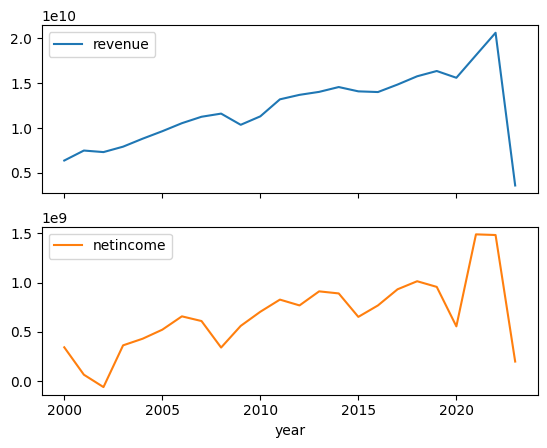

In [26]:
# Graph the information stored in the last table
r_ni_y = datay[['year','revenue', 'netincome']].groupby('year').sum().plot(subplots = True, legend=True)

ANALYZING THE GRAPH, WE CAN NOTICE AN UPWARD TREND IN THE TOTAL REVENUES, HAVING A GROWTH OF 2 TIMES MORE THAN THE REVENUES THE US FIRMS HAD IN THE YEAR 2000. WE CAN'T TAKE INTO CONSIDERATION THE YEAR 2023 SINCE IT'S NOT COMPLETE YET, AND THE EVALUATION CONSIDERS THE MARKET VALUE AMONG THE YEAR, SO THE LAST COMPLETE YEAR IS 2022.

THE OBSERVED GROWING TREND GIVES US INFORMATION ABOUT HOW RISKY OR INTERESTING IT WOULD BE TO INVEST, IN THIS CASE, THE RISK IS SOMEHOW LOW SINCE THE FLUCTUATIONS ARE NOT BIG, ENSURING A SAFER INVESTMENT. THE REVENUES GRAPH CAN TELL US WHETHER A A COMPANY IS HAVING TROUBLE WITH ITS SALES OR, ON THE OTHER HAND, GROWING ITS SALES IN CERTAIN PERIOD OF TIME. 



THE NET INCOME GRAPH ALONG THE YEARS GIVES US INFORMATION ABOUT THE BEHAVIOUR OF THE TOTAL EARNINGS OF THE COMPANY AFTER SUBTRACTING THE ECONOMICAL OBLIGATIONS AND RESPONSABILITIES. WE CAN OBSERVE THERE IS SOME VOLATILITY IN THE DATA BETWEEN PERIODS OF TIME, MEANING THERE ARE UP AND DOWNS. WE CAN INTERPRET FROM THIS VARIATIONS THAT THERE ARE SOME PERIODS IN WHICH THERE'S AN IMPROVED PROFITABILITY AND THERE'S SOME WHERE THE FINANCIAL PERFORMANCE OF THE COMPANY IS REALLY LOW.

WE CAN SEE THERE'S A NET GROWTH OF 3 TIMES THE NET INCOME FROM 2000 TO THE YEAR 2022, SINCE IT'S THE LAST COMPLETE FINANCIAL YEAR.

## 1.4 Learing about one industry

Service Industries

# 1.4.1 Descriptive statistics for your industry

### Using the subsample of your industry and using annual fiscal information (selecting rows with fiscalmonth=12), and the most recent complete year (2022), do the following

### Show descriptive statistics for future quarterly log return, annual return, total assets, revenue, netincome and all financial ratios calculated above. Provide a clear interpretation of the descriptive statistics of revenue and 1 financial ratio

In [27]:
# Filter data by industry, annual fiscal information at the most recent complete year and with an active status
services_2022 = data.loc[(data.industria.str.contains('Servicios')) & (data.fiscalmonth == 12) & (data.year == 2022) & (data.status == 'activo')].copy()

# Drop 'Servicios financieros y de seguros' from our industry selection, since it's a separate industry
services_2022.drop(services_2022.loc[services_2022.industria == 'Servicios financieros y de seguros'].index, inplace = True)

# Select variables and ratios from the data frame and get a descriptive statistics analysis from it
services_2022 = services_2022[['firm', 'q', 'revenue', 'netincome', 'totalassets', 'mvalue', 'bookvalue', 'opm', 'pm', 'ato', 'finlev', 'acidratio', 'rq', 'f1rq']]
services_2022.describe()

,revenue,netincome,totalassets,mvalue,bookvalue,opm,pm,ato,finlev,acidratio,rq,f1rq
count,485.00,480.00,485.00,481.00,485.00,475.00,475.00,480.00,463.00,457.00,479.00,481.00
mean,"3,931,531.23","314,946.55","6,663,127.22","10,962,585.65","2,357,628.02",-2.41,-3.03,0.88,0.33,3.26,-0.03,0.03
std,"15,280,328.64","3,303,838.26","22,903,181.50","60,311,972.18","14,114,573.13",25.13,37.17,1.57,0.29,11.05,0.30,0.27
min,0.00,"-16,720,000.00","2,704.28","3,455.37","-8,876,000.00",-459.92,-755.42,0.00,0.00,0.09,-1.85,-1.37
25%,"249,200.00","-25,052.85","391,041.00","250,390.80","60,118.00",-0.08,-0.11,0.37,0.07,1.01,-0.16,-0.09
50%,"821,354.00","12,558.50","1,533,100.00","1,277,904.45","399,150.00",0.05,0.03,0.63,0.29,1.50,0.03,0.04
75%,"2,825,379.00","177,727.50","5,334,100.00","4,820,800.60","1,505,067.00",0.14,0.09,1.05,0.48,2.53,0.15,0.17
max,"282,836,000.00","59,972,000.00","365,264,000.00","1,141,960,890.00","256,144,000.00",0.81,9.94,29.46,1.96,208.29,0.88,1.21


#### REVENUE

The descriptive satistics of Revenue tells us how the data is distributed along the years; we're talking about 485 registers of different Services Industry firms. Since there are really disperse data, the standard deviation value is really high and the mean is not a value we can take into consideration when talking about the typical revenue of a firm in a period of time. We can simply observe the great difference between the maximum and minimum values, there are even firms with 0.00 as revenue for that period of time. 

#### ACID RATIO

The descriptive statistics of the Acid Ratio tells us whether a company has the ability to fulfill its economical obligations relying on the assets owned at the moment. Noticing the mean with its standard deviation, we can see there's not a normal distribution, meaning we have outliers from our data than can be causing this weird values. Since we're talking about the ability of covering their taxes, debts, with their assets, we can see that the extreme values in this ratio are due to the extremely wealthy firms. So we report the median value, in which 50% of the data falls, when analyzing this value we can observe that a typical acid ratio for the services industry is around 1.50, which means the firms are able to fulfill this obligations with their current assets. This can be seen when the acid ratio is greater than 1.0, on the contrary, if the acid ratio is less than 1.0, there's a high probability the firm won't be able to cover this obligations with their assets, and may need to use other resources.

### Using annual fiscal data (selecting rows with fiscalmonth=12), and all years

### Show a correlation matrix with the same variables you used for descriptive statistics above, but in the case of totalassets, revenue and netincome, use the logarithmic transformation of their values. Which variables have strongest and significant linear relationship with stock returns (annual and quarterly)? Explain

In [28]:
# Ignore warnings about encountered divisions by 0
np.seterr(divide = 'ignore') 

# Filter data set by industry, annual fiscal data and an active status
services = data.loc[(data.industria.str.contains('Servicios')) & (data.fiscalmonth == 12) & (data.status == 'activo')].copy()

# Drop 'Servicios financieros y de seguros' from our industry selection, since it's a separate industry
services.drop(services.loc[services.industria == 'Servicios financieros y de seguros'].index, inplace = True)

# Select variables and ratios from the data frame
services = services[['firm', 'q', 'revenue', 'netincome', 'totalassets', 'mvalue', 'bookvalue', 'opm', 'pm', 'ato', 'finlev', 'acidratio', 'rq', 'ry', 'f1rq']]

# Use the logarithm transformation to the variables which are not ratios and merge them to the dataframe
services['logta'] = np.where(services['totalassets'] == 0, np.NaN, np.log(services['totalassets']))
services['logrev'] = np.where(services['revenue'] == 0, np.NaN, np.log(services['revenue']))
services['logni'] = np.where(services['netincome'] == 0, np.NaN, np.log(services['netincome']))
services

C:\Users\hilda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,firm,q,revenue,netincome,totalassets,mvalue,bookvalue,opm,pm,ato,finlev,acidratio,rq,ry,f1rq,logta,logrev,logni
2514,ABM,2011q4,"4,246,842.00","68,504.00","1,879,598.00","1,100,149.40","795,886.00",0.03,0.02,2.26,0.16,1.66,0.09,NaN,0.17,14.45,15.26,11.13
2518,ABM,2012q4,"4,300,265.00","62,582.00","1,869,251.00","1,085,532.03","850,398.00",0.02,0.01,2.30,0.12,1.62,0.07,0.00,0.11,14.44,15.27,11.04
2522,ABM,2013q4,"4,809,281.00","72,900.00","2,119,236.00","1,587,411.60","917,507.00",0.02,0.02,2.27,0.15,1.70,0.08,0.38,0.01,14.57,15.39,11.20
2526,ABM,2014q4,"5,032,800.00","75,600.00","2,192,900.00","1,597,236.55","968,800.00",0.03,0.02,2.30,0.15,1.76,0.11,0.02,0.11,14.60,15.43,11.23
2530,ABM,2015q4,"4,897,800.00","76,300.00","2,149,800.00","1,596,367.05","1,007,500.00",0.02,0.02,2.28,0.07,1.67,0.04,0.01,0.13,14.58,15.40,11.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532117,ZS,2018q3,"190,174.00","-33,646.00","447,781.00","4,884,348.32","240,236.00",-0.18,-0.18,0.42,0.00,2.12,0.13,NaN,-0.04,13.01,12.16,NaN
532121,ZS,2019q3,"302,836.00","-28,655.00","604,162.00","6,023,519.80","308,558.00",-0.12,-0.09,0.50,0.00,1.89,-0.48,0.15,-0.02,13.31,12.62,NaN
532125,ZS,2020q3,"431,269.00","-115,116.00","1,833,458.00","18,698,591.43","484,829.00",-0.26,-0.27,0.24,0.49,3.73,0.25,1.09,0.35,14.42,12.97,NaN
532129,ZS,2021q3,"673,100.00","-262,029.00","2,257,631.00","36,379,348.94","528,895.00",-0.31,-0.39,0.30,0.42,2.57,0.19,0.62,0.20,14.63,13.42,NaN


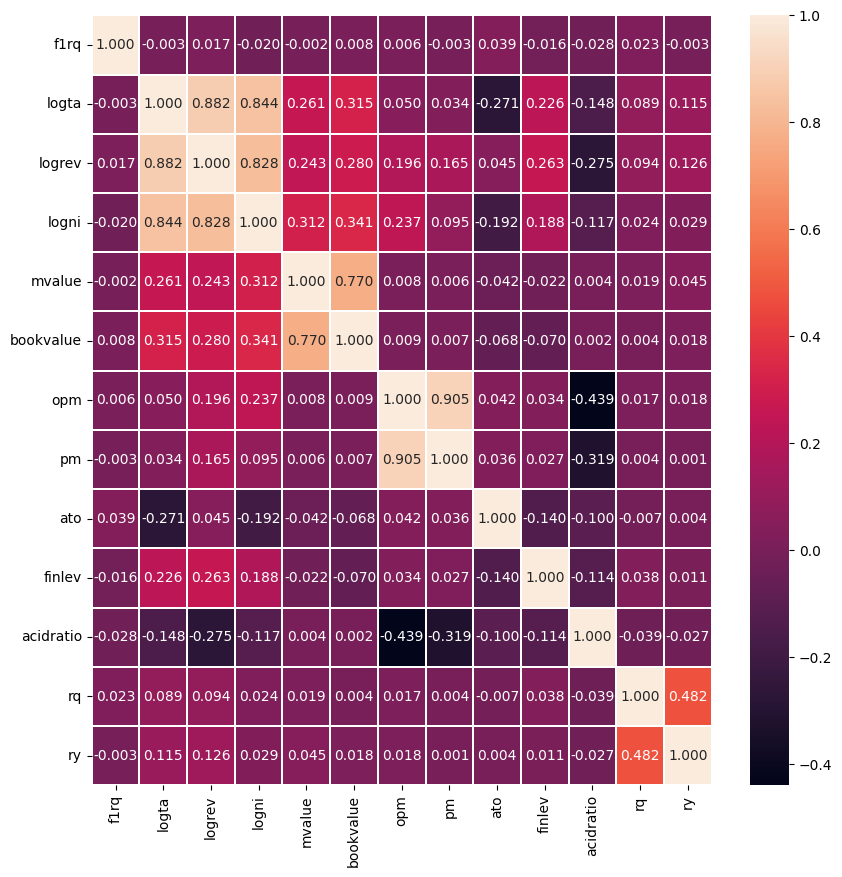

In [29]:
# Import libraries to plot correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new figure, since we have many variables in the matrix we need a bigger figure
plt.figure(figsize=(10,10))

# Define the columns to evaluate in the correlation matrix
corr_matrix = services[['f1rq', 'logta', 'logrev', 'logni', 'mvalue', 'bookvalue', 'opm', 'pm', 'ato', 'finlev', 'acidratio', 'rq', 'ry']].corr()

# Create a heatmap with the previous columns and show it
sns.heatmap(corr_matrix, annot=True, linewidths=0.3, fmt='0.3f')
plt.show()

#### Correlation stock returns quarterly
The variables with a higher correlation with the stock returns quarterly (rq) are the logarithm transformation of the total assets column and the logarithm transformation of the revenues column. Since both their correlation value is the higher among all the features in the dataset. The correlation between both variables and the quarterly stock returns is positive, meaning if one variable grows, the other is expected to grow too.

#### Correlation stock returns annually
Talking about the correlation with the stock returns annually (ry), the variables that have a higher correlation with this are the same as with the quarterly stock returns. Since in this case, the logarithm transformation of the total assets and the revenues have the closest value to |1|.

#### Observations
Even though these are the variables with the strongest linear relationship with the stock returns, it doesn't mean it is a strong linear relationship, since our correlation value is closer to zero than it is to one, the linear relationship may exist but it won't be a strong one. Meaning if we chose this variables to make a prediction model, we would get a low coefficient of determination; we can't rely on one variable impacting the other, and we could actually see if they change independently. These low correlation can mean only small parts of our variance in the stock returns could be explained by the logarithm of total assets.

### Select 2-3 variables and 2-3 ratios with the strongest correlation with future log quarterly returns and do the following

#### Variables

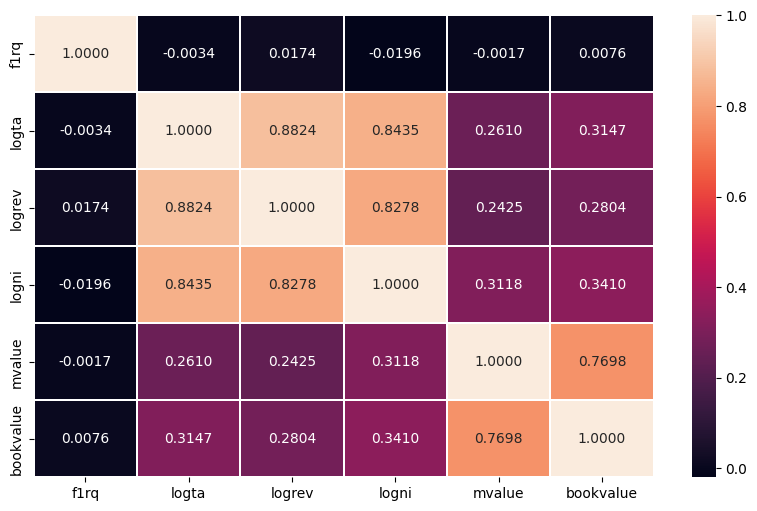

In [31]:
# Create a figure to plot a new correlation matrix for the future log quarterly returns and variables
plt.figure(figsize=(10,6))

# Define which features are going to be considered and obtain its matrix
corr_matrix = services[['f1rq', 'logta', 'logrev', 'logni', 'mvalue', 'bookvalue']].corr()

# Plot a heatmap of the resulting correlation matrix and show it
sns.heatmap(corr_matrix, annot=True, linewidths=0.3, fmt='0.4f')
plt.show()

### Variables with a higher correlation with future log quarterly returns
After analyzing the heatmap, I observed the 3 variables with a higher correlation were the logarithm transformation of the net income, the logarithm transformation of the revenues and the book value. Since these correlation coefficiente are the ones closer to |1|, even though, as we saw in the last question, this doesn't mean there's a strong linear relationship between the variables and the future log quarterly returns. The logarithm transformation of the revenues and the bookvalue have a positive linear relationship, meaning if one variable grows, the other is expected to grow too. While the logarithm transformation of the net income has a negative linear regression, so when one variable grows, the other is expected to decrement.

#### Ratios

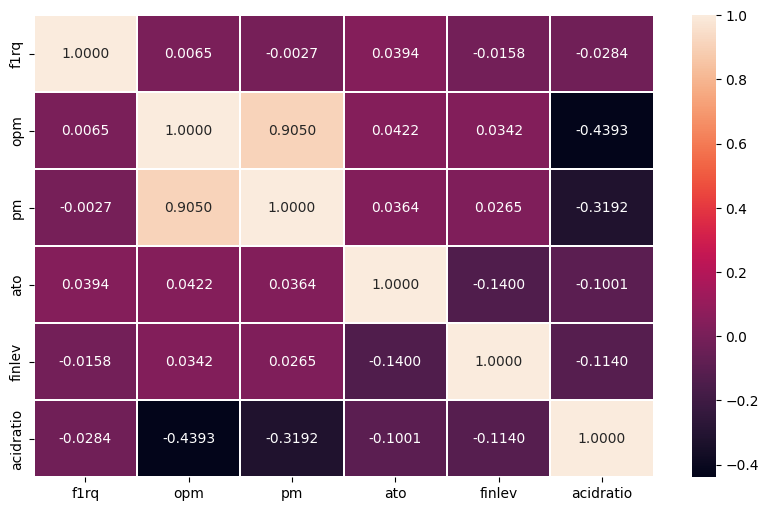

In [32]:
# Create a figure to plot a new correlation matrix for the future log quarterly returns and variables
plt.figure(figsize=(10,6))

# Define which features are going to be considered and obtain its matrix
corr_matrix = services[['f1rq', 'opm', 'pm', 'ato', 'finlev', 'acidratio']].corr()

# Plot a heatmap of the resulting correlation matrix and show it
sns.heatmap(corr_matrix, annot=True, linewidths=0.3, fmt='0.4f')
plt.show()

### Ratios with a higher correlation with future log quarterly returns

The above heatmap gives us information about how correlated each variable is with another, in this case we want to find which ratios have a higher correlation coefficient with the future log quarterly returns. We found out that the asset turn over ratio, the acid ratio and the financial leverage ratio were the more correlated. As seen in the previous question, the correlation between these variables is really low, meaning there's not a strong linear relationship between the ratios and the future log quarterly returns. The asset turn over correlation with the future log quarterly returns is positive, meaning both grow or decrement proportionally. While the financial leverage ratio and the acid ratio are negative linear regressions, meaning if one grows, the other is expected to decrement its value.

### Do histograms for each factor/variables and interpret them

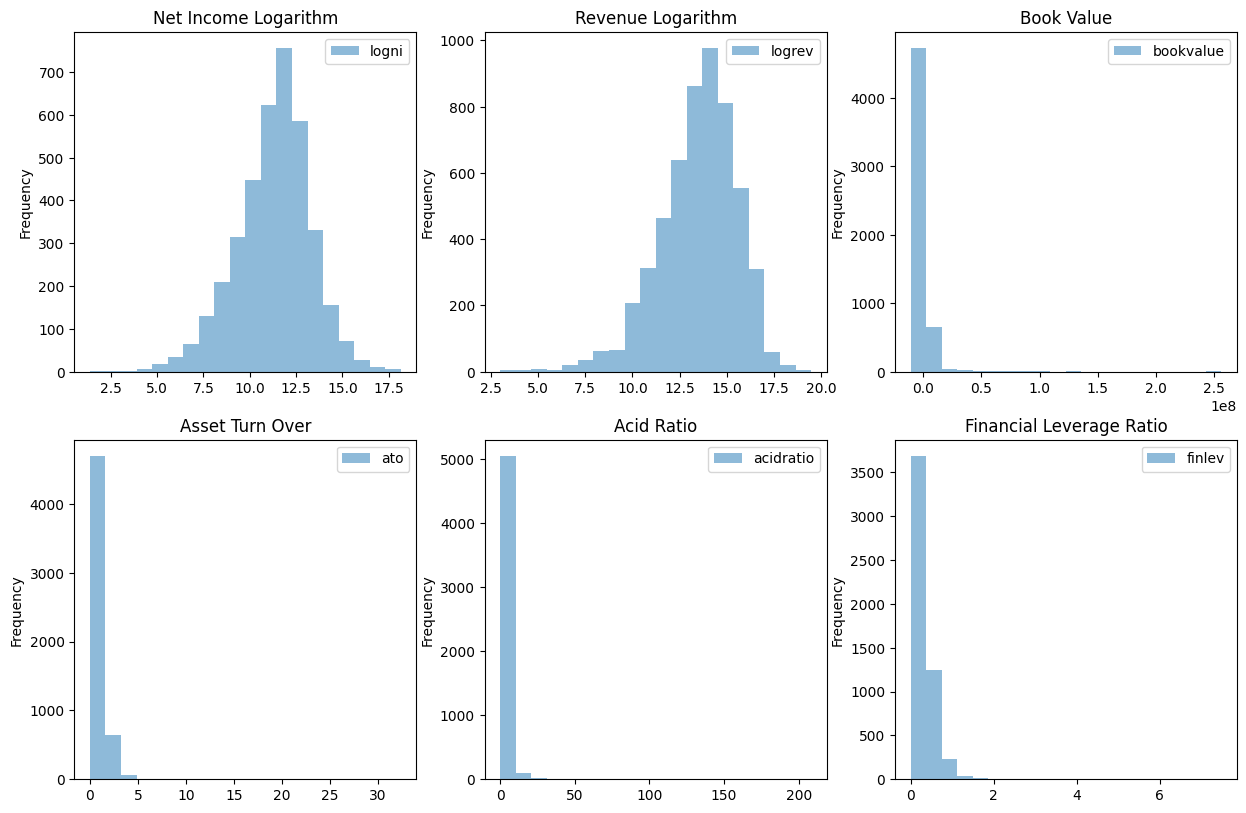

In [104]:
plt.figure(figsize = (15,15))

plt.subplot(3,3,1)
logni = services[['logni']]
logni.plot.hist(bins = 20, alpha = 0.5, title = "Net Income Logarithm", ax=plt.gca())

plt.subplot(3,3,2)
logrev = services[['logrev']]
logrev.plot.hist(bins = 20, alpha = 0.5, title = "Revenue Logarithm", ax=plt.gca())

plt.subplot(3,3,3)
bvalue = services[['bookvalue']]
bvalue.plot.hist(bins = 20, alpha = 0.5, title = "Book Value", ax = plt.gca())

plt.subplot(3,3,4)
ato = services[['ato']]
ato.plot.hist(bins = 20, alpha = 0.5, title = "Asset Turn Over", ax = plt.gca())

plt.subplot(3,3,5)
acidratio = services[['acidratio']]
acidratio.plot.hist(bins = 20, alpha = 0.5, title = "Acid Ratio", ax = plt.gca())

plt.subplot(3,3,6)
finlev = services[['finlev']]
finlev.plot.hist(bins = 20, alpha = 0.5, title = "Financial Leverage Ratio", ax = plt.gca())

plt.show()

### Do plots to visualize the possible relationship each factor might have with quarterly returns (the dependent variable).

<Axes: xlabel='finlev', ylabel='f1rq'>

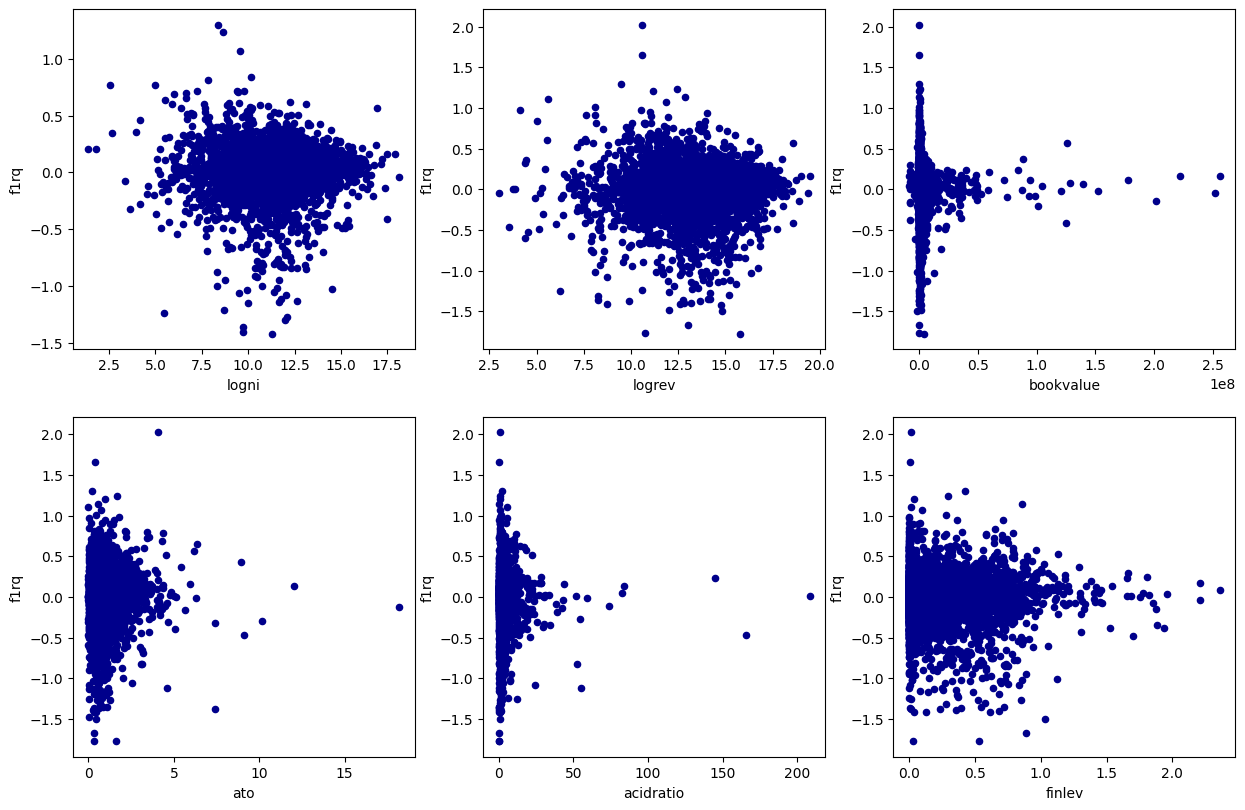

In [112]:
plt.figure(figsize = (15,15))

plt.subplot(3,3,1)
services.plot.scatter(x='logni', y='f1rq', c='DarkBlue', ax = plt.gca())

plt.subplot(3,3,2)
services.plot.scatter(x='logrev', y='f1rq', c='DarkBlue', ax = plt.gca())

plt.subplot(3,3,3)
services.plot.scatter(x='bookvalue', y='f1rq', c='DarkBlue', ax = plt.gca())

plt.subplot(3,3,4)
services.plot.scatter(x='ato', y='f1rq', c='DarkBlue', ax = plt.gca())

plt.subplot(3,3,5)
services.plot.scatter(x='acidratio', y='f1rq', c='DarkBlue', ax = plt.gca())

plt.subplot(3,3,6)
services.plot.scatter(x='finlev', y='f1rq', c='DarkBlue', ax = plt.gca())

From the last scatter plots we see that there's actually not an obvious pattern in neither one of the variables with the future log quarterly returns, even though we can find small correlations when the variable/ratio is close to zero. These plots gives us a clearer idea of what the correlation matrix meant by the low values of correlation, in the case of the logarithm transformation of the net income and the revenues, we can't find this small pattern when the variables are close to zero. We can interpret that, maybe there's a linear relationship between the variables/ratios and the future log quarterly returns, but it may be very weak we can't even see a pattern.

### Design and run a first version of a multiple regression model to examine whether your selected factors can explain/predict quarterly stock returns.

In [34]:
# Import library to design a multiple regression model
import statsmodels.api as sm

# 
services_nd = services.dropna()

X = services_nd[['logni', 'logrev', 'bookvalue', 'ato', 'acidratio', 'finlev']]
X = sm.add_constant(X)

Y = services_nd['f1rq']

mkmodel = sm.OLS(Y, X).fit()

print(mkmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                   f1rq   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.403
Date:                Wed, 06 Sep 2023   Prob (F-statistic):              0.209
Time:                        14:28:58   Log-Likelihood:                 327.36
No. Observations:                3266   AIC:                            -640.7
Df Residuals:                    3259   BIC:                            -598.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0051      0.039     -0.129      0.8

The last regression model has a really low coefficient of determination (R^2), which means the accuracy of the model. We can interpret the factors selected doesn't explain the quarterly stock returns, and we have negative and positive values in the 95% confidence interval, not giving us confidence within the model.

### You must check for possible multicollinearity problems. Briefly explain what is multicollinearity, run and interpret the corresponding test

In [40]:
# Import library to calculate multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a data frame with the columns of the services
features = pd.DataFrame()
features["feature"] = X.columns

# Add a column for the variance inflation factor
features['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
features

,feature,VIF
0,const,103.74
1,logni,3.87
2,logrev,3.97
3,bookvalue,1.22
4,ato,1.21
5,acidratio,1.11
6,finlev,1.14


Multicollinearity happens when we have more than one independent variable, and they have a high correlation between them. In this case, I used the VIF technique to detect multicollinearity.

The features of the logarithm transformation of the net income and the logarithm transformation of the revenues have the higher correlation between them, even though it's not an extremely high value since the general correlation is not high. 

### (optional) For each independent variable (variable/ratio) check if winsorization is needed according to very extreme values. You can check this with the histograms of each variable/ratio. If it is necessary do the corresponding adjustments with winsorization to avoid unreliable results in your regression model

### Once you corrected your variables/ratios with winsorization (in case you did it) and addressed possible multicollienarity problems, run a final multiple regression model

### Interpret your model
### Interpret with your own words the results of each coefficient (beta and their statistical significance)
### Interpret the R-squared of the model
### Write a conclusion of your results